In [1]:
# 📚 Basic Libraries
import numpy as np # numerical python
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings
import os
%matplotlib inline

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 🔧 Basic functions

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
os.listdir()

['.config', 'website.csv', 'sample_data']

In [3]:
websites = pd.read_csv('website.csv')

In [4]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
websites.shape

(1781, 21)

In [6]:
df = websites.copy()

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [7]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [8]:
snake_columns(df)

In [9]:
df.columns

Index(['url', 'url_length', 'number_special_characters', 'charset', 'server',
       'content_length', 'whois_country', 'whois_statepro', 'whois_regdate',
       'whois_updated_date', 'tcp_conversation_exchange',
       'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [10]:
# Checking num columns for correlations
num = df.select_dtypes(include='number')

In [11]:
num.head(2)

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0


In [12]:
# Numerical correlation:
num_corr = num.corr().round(2)

In [13]:
num.corrwith(num['type']).round(2).sort_values(ascending=False)

type                         1.00
number_special_characters    0.28
url_length                   0.16
dns_query_times              0.07
app_bytes                   -0.01
remote_app_bytes            -0.01
source_app_packets          -0.03
remote_app_packets          -0.03
app_packets                 -0.03
tcp_conversation_exchange   -0.04
source_app_bytes            -0.04
dist_remote_tcp_port        -0.08
remote_ips                  -0.08
content_length              -0.09
dtype: float64

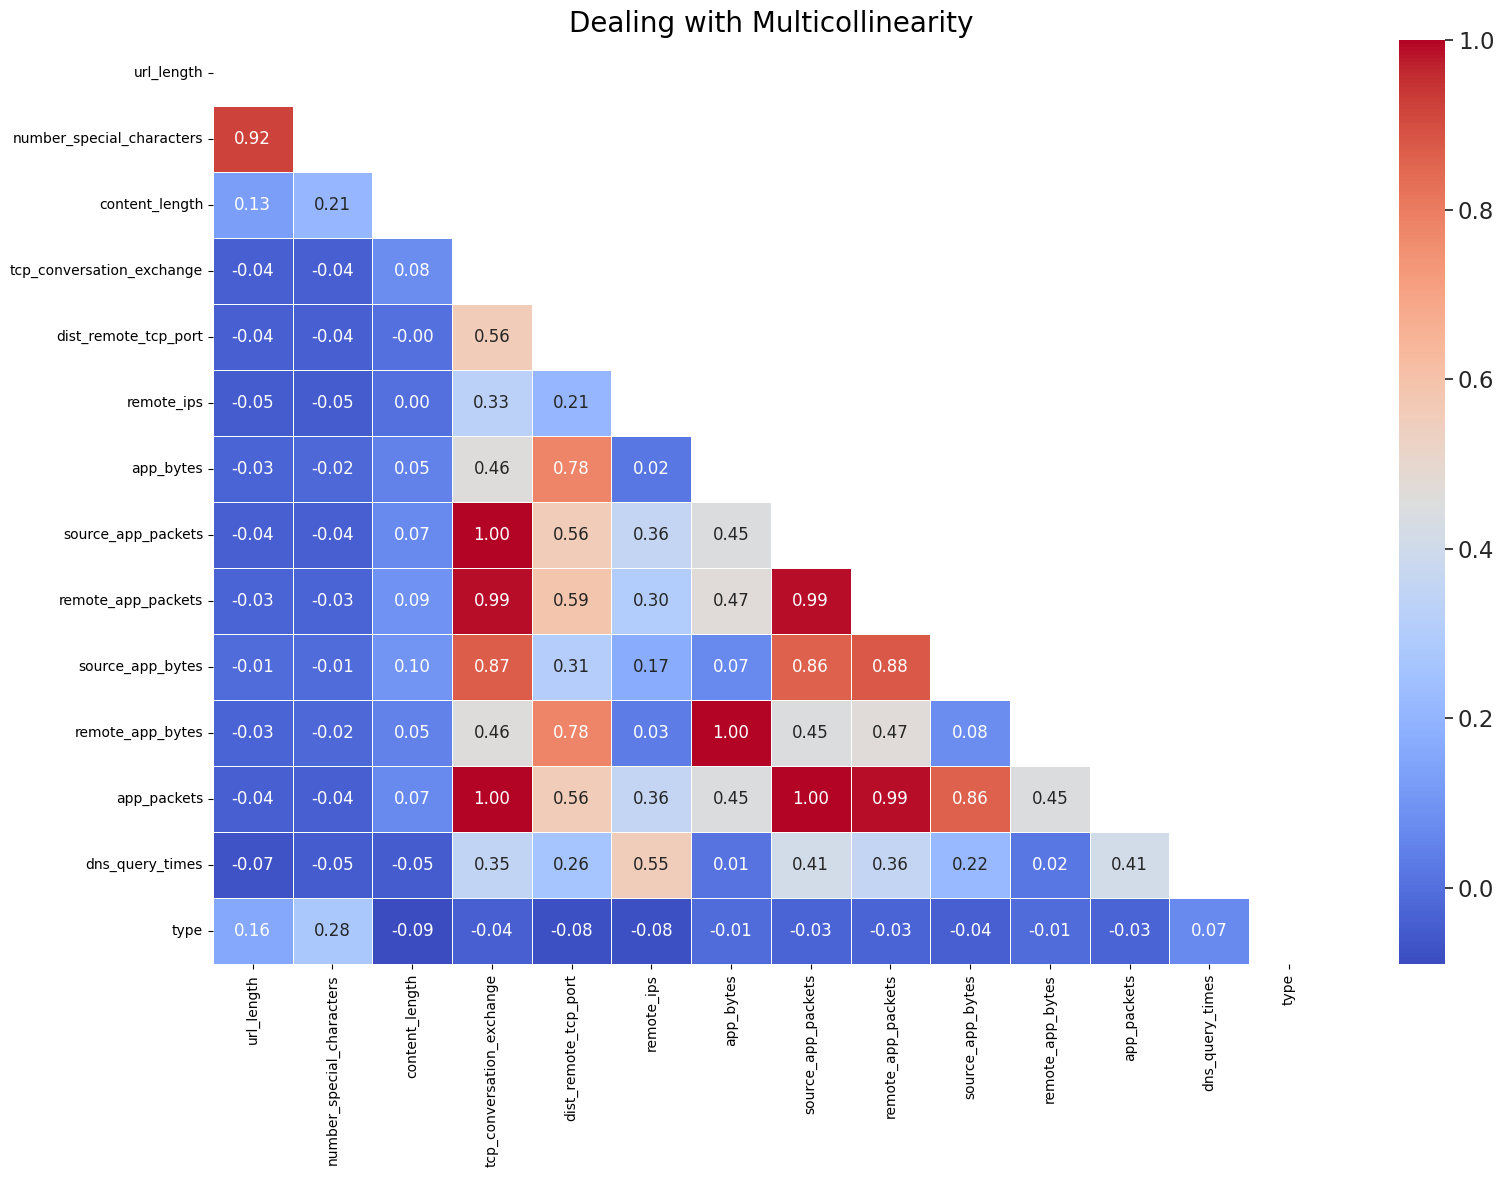

In [14]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(18, 12))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

**Potential columns to drop:**

* Columns related to `packets` (`app_packets`, `source_app_packets`, `remote_app_packets`)
* `tcp_conversation_exchange`
* `remote` related columns
* `app_packets`

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [15]:
# Removing [tcp_conversation_exchange] because has high correlation with [packets] related columns:
df = df.drop(columns=['tcp_conversation_exchange'])

In [16]:
# Also removing the "remote" and  realted columns like: [remote_app_packets], [remote_app_bytes]
df = df.drop(columns=['remote_app_packets', 'remote_app_bytes'])

In [17]:
# Also removing [app_packets] as it is very related to "Source_app_packets" & "source_app_bytes"
df = df.drop(columns=['app_packets'])

In [18]:
# New heatmap with no [tcp_conversation_exchange] column:
num = df.select_dtypes(include='number')
# Numerical correlation:
num_corr = num.corr().round(2)
num.corrwith(num['type']).round(2).sort_values(ascending=False)

type                         1.00
number_special_characters    0.28
url_length                   0.16
dns_query_times              0.07
app_bytes                   -0.01
source_app_packets          -0.03
source_app_bytes            -0.04
dist_remote_tcp_port        -0.08
remote_ips                  -0.08
content_length              -0.09
dtype: float64

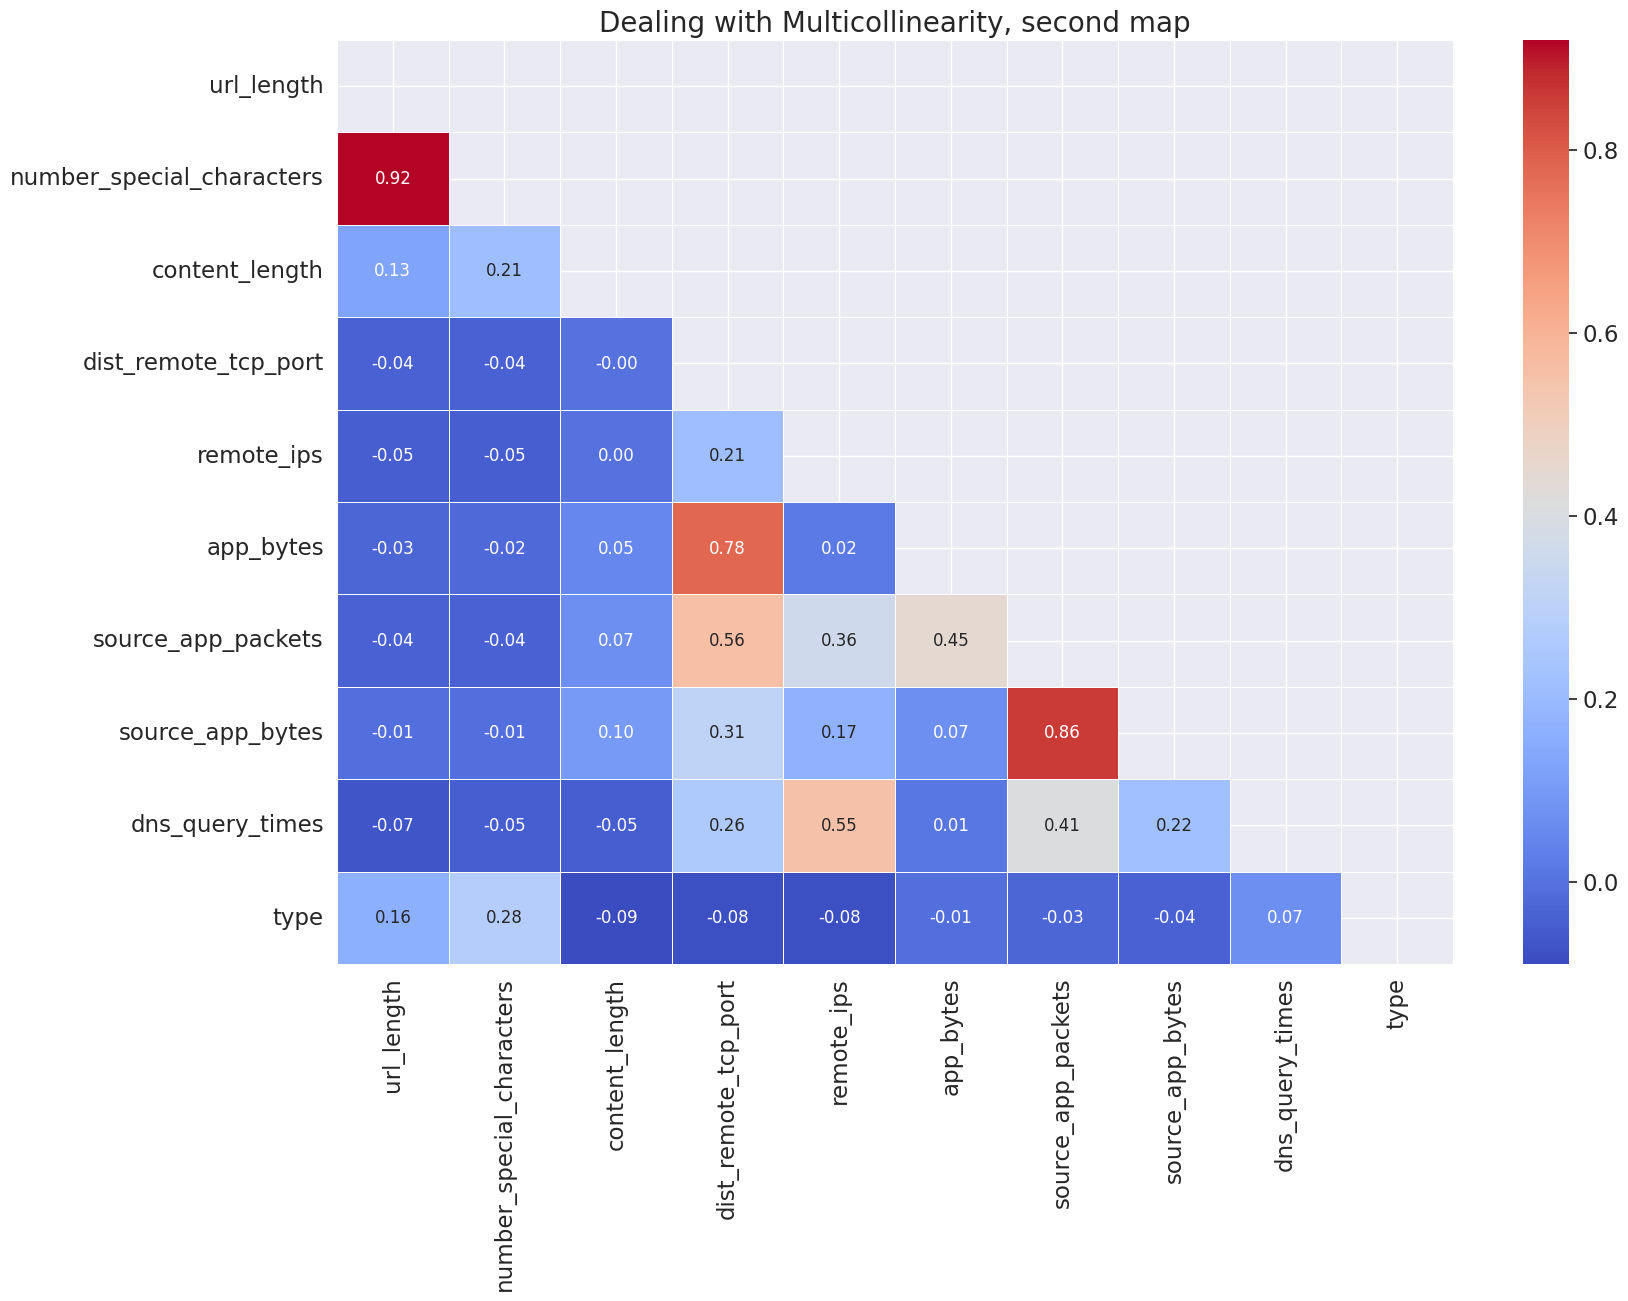

In [19]:
# Print heatmap again
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(18, 12))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity, second map", fontsize=20) # add title
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [20]:
# Your code here
df.isnull().sum().sort_values(ascending=False)

content_length               812
whois_statepro               362
whois_country                306
server                       176
whois_updated_date           139
whois_regdate                127
charset                        7
dns_query_times                1
app_bytes                      0
source_app_bytes               0
source_app_packets             0
url                            0
remote_ips                     0
dist_remote_tcp_port           0
url_length                     0
number_special_characters      0
type                           0
dtype: int64

In [21]:
df.shape

(1781, 17)

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [22]:
# rows containing at least one missing value:
missing_values = df[df.isnull().any(axis=1)]
len(missing_values)

1145

In [23]:
# [content_length] = aprox contains 70% of total missing values
# We drop [content_length]
df.drop("content_length", axis=1, inplace=True)

#### Again, examine the number of missing values in each column.

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [24]:
# Examine missing values in each column
df.isnull().sum().sort_values(ascending=False)

whois_statepro               362
whois_country                306
server                       176
whois_updated_date           139
whois_regdate                127
charset                        7
dns_query_times                1
url                            0
url_length                     0
number_special_characters      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
source_app_bytes               0
type                           0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [25]:
# [whois_country] column unique values
df['whois_country'].nunique()

48

In [26]:
# List countries listed in [whois_country] column
df['whois_country'].value_counts()

whois_country
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [27]:
country_map = {
    'CY': 'CY',
    'GB': 'UK',
    'United Kingdom': 'UK',
    'Cyprus': 'CY',
    "[u'GB'; u'UK']": 'UK'
}

In [28]:
# Apply mapping only to specified countries
df['whois_country'] = df['whois_country'].map(country_map).fillna(df['whois_country'])

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [29]:
# Check results:
countries_list = df['whois_country'].value_counts()
countries_list

whois_country
US    1103
CA      84
ES      63
UK      35
AU      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
NL       6
CH       6
KR       5
PH       4
BS       4
ru       4
AT       4
DE       3
TR       3
HK       3
BE       3
KY       3
SC       3
SE       3
us       3
BR       2
UA       2
CY       2
UY       2
KG       2
RU       2
NO       2
IL       2
SI       2
LV       1
se       1
PK       1
IT       1
LU       1
BY       1
AE       1
IE       1
UG       1
TH       1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [30]:
# Top 10 countries list:
top_10_countries = countries_list.head(10).index
top_10_countries

Index(['US', 'CA', 'ES', 'UK', 'AU', 'PA', 'JP', 'CN', 'IN', 'FR'], dtype='object', name='whois_country')

In [31]:
df['whois_country'] = df['whois_country'].apply(lambda x: x if x in top_10_countries else 'OTHER')

In [32]:
# Check results:
df['whois_country'].value_counts()

whois_country
US       1103
OTHER     400
CA         84
ES         63
UK         35
AU         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [33]:
# Your code here
df = df.drop(columns=['whois_statepro', 'whois_regdate', 'whois_updated_date'])

In [34]:
df.columns

Index(['url', 'url_length', 'number_special_characters', 'charset', 'server',
       'whois_country', 'dist_remote_tcp_port', 'remote_ips', 'app_bytes',
       'source_app_packets', 'source_app_bytes', 'dns_query_times', 'type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [35]:
# Your code here
df.dtypes

url                           object
url_length                     int64
number_special_characters      int64
charset                       object
server                        object
whois_country                 object
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [36]:
# Droping [url]:
df = df.drop(columns=['url'])

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [37]:
# Your code here
df['charset'].value_counts()

charset
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [38]:
# Your code here
df['server'].nunique()

238

In [39]:
df['server'].value_counts()

server
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [40]:
# Your comment here
# Majority are Apache, microsoft

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [41]:
# Define function to categorize servers
def server_type(server):
    if isinstance(server, str):
        if 'Microsoft' in server:
            return 'Microsoft'
        elif 'Apache' in server:
            return 'Apache'
        elif 'nginx' in server:
            return 'nginx'
    return 'Other'

In [42]:
# # Apply the function to the 'server' column
df['server'] = df['server'].apply(server_type)

In [43]:
# Check results with value counts:
df['server'].value_counts()

server
Apache       643
Other        505
nginx        435
Microsoft    198
Name: count, dtype: int64

In [44]:
# Count `SERVER` value counts here
df['server'].nunique()

4

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [45]:
df.dtypes

url_length                     int64
number_special_characters      int64
charset                       object
server                        object
whois_country                 object
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
dtype: object

In [46]:
# Categorical columns so far are: ['charset', 'server', 'whois_country']

In [47]:
# Apply get_dummies to categorical columns:
website_dummy = pd.get_dummies(df[['charset', 'server', 'whois_country']])

In [48]:
# Add the website dummies to a fixed dataset called: fixed_df
fixed_df = pd.concat([df, website_dummy], axis=1)

In [49]:
# Drop the categorical columns in fixed_df to only have numerical:
fixed_df.drop(['charset', 'server', 'whois_country'], axis=1, inplace=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [50]:
# Check results, now we have fixed_df with only numericals:
fixed_df.dtypes

url_length                     int64
number_special_characters      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
charset_ISO-8859                bool
charset_ISO-8859-1              bool
charset_UTF-8                   bool
charset_iso-8859-1              bool
charset_us-ascii                bool
charset_utf-8                   bool
charset_windows-1251            bool
charset_windows-1252            bool
server_Apache                   bool
server_Microsoft                bool
server_Other                    bool
server_nginx                    bool
whois_country_AU                bool
whois_country_CA                bool
whois_country_CN                bool
whois_country_ES                bool
whois_country_FR                bool
whois_country_IN                bool
w

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
fixed_df.type.value_counts()

type
0    1565
1     216
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# X-y Spliting data:
X = fixed_df.drop('type', axis=1) # type is our target column (binari 0-1)
y = fixed_df['type']

In [54]:
# Doing X_train, X_test, y_train, and y_test with 80% / 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(f'100% of our data: {len(fixed_df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 1781.
80% for training data: 1424.
20% for test data: 357.


In [56]:
# Fixing a Naan that was not allowling the logistic ML to work:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Applying mean to the Naan
X_train = imputer.fit_transform(X_train)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [57]:
# Logistic regresion model:
log_model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [58]:
# Training (fit) losgistic regresion with training data:
log_model.fit(X_train, y_train)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [59]:
# Logistic regresion predictions:
log_predictions = log_model.predict(X_test)

In [60]:
print(f'20% for test prediction data: {len(log_predictions)}.')

20% for test prediction data: 357.


In [61]:
# Logistic regression results:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       306
           1       0.74      0.49      0.59        51

    accuracy                           0.90       357
   macro avg       0.83      0.73      0.77       357
weighted avg       0.89      0.90      0.89       357



In [62]:
# Logistic reg. accuracy results:
print("Test data accuracy: ",log_model.score(X_test,y_test))
print("Train data accuracy: ", log_model.score(X_train, y_train))

Test data accuracy:  0.9019607843137255
Train data accuracy:  0.9241573033707865


<Figure size 800x600 with 0 Axes>

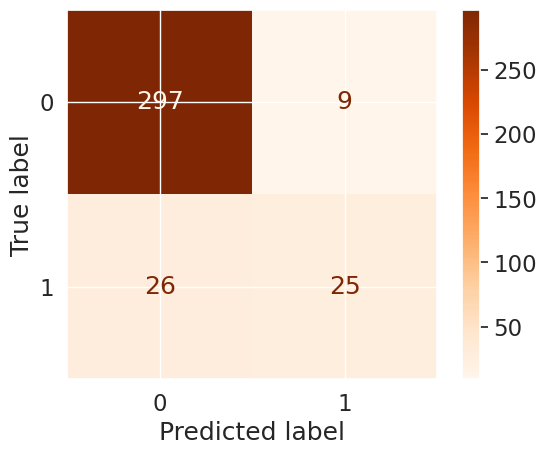

In [63]:
# Confusion metrics:
log_cm = confusion_matrix(y_test, log_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=log_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

#### Our second algorithm is is K-Nearest Neighbors.

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [64]:
# Importing K-neighbors library:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
k_model = KNeighborsClassifier(n_neighbors=3) # k=3

In [66]:
# Training K-neigh model:
k_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
# K_neighbors predictions:
k_predictions = k_model.predict(X_test)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [68]:
# K-neraset neighbourd test results:
print(classification_report(y_test, k_predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       306
           1       0.88      0.59      0.71        51

    accuracy                           0.93       357
   macro avg       0.91      0.79      0.83       357
weighted avg       0.93      0.93      0.92       357



In [69]:
print("Test data accuracy: ",k_model.score(X_test,y_test))
print("Train data accuracy: ", k_model.score(X_train, y_train))

Test data accuracy:  0.9299719887955182
Train data accuracy:  0.9571629213483146


<Figure size 800x600 with 0 Axes>

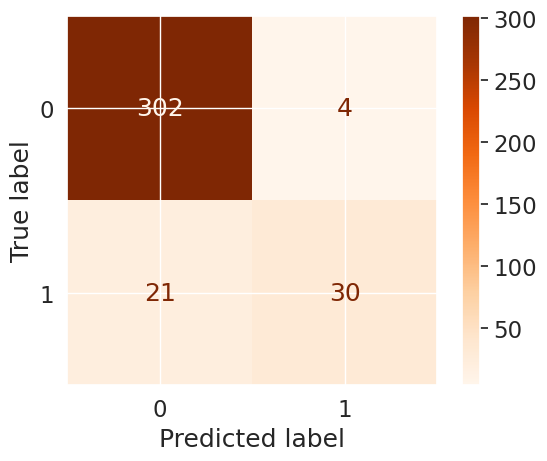

In [70]:
# K-nearest confusion matrix:
k_cm = confusion_matrix(y_test, k_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=k_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

**Conclusions:**
* K-nearest neighbor is better ML model for predictions compared to Logistic regresion
* K-nearest has highe True-positives, higher accuracy and higher True-negatives

#### We'll create another K-Nearest Neighbors model with k=5.

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [71]:
k_5_model = KNeighborsClassifier(n_neighbors=5) # k=5

In [72]:
# Training K-neigh model:
k_5_model.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# K_5 neighbors predictions:
k_5_predictions = k_5_model.predict(X_test)

In [74]:
# K-5 neraset neighbourd test results:
print(classification_report(y_test, k_5_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       306
           1       0.83      0.59      0.69        51

    accuracy                           0.92       357
   macro avg       0.88      0.78      0.82       357
weighted avg       0.92      0.92      0.92       357



<Figure size 800x600 with 0 Axes>

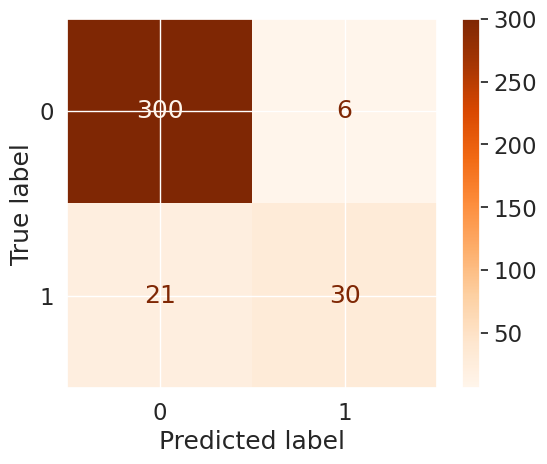

In [75]:
# K-5 nearest confusion matrix:
k_5_cm = confusion_matrix(y_test, k_5_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=k_5_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

* K=5 Model is having worse prediction
* The number of True positives dropped from 302 > 300
* We can conclude K=3 is a better model prediction compared to k=5

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [76]:
# Your code here